# Questão 5 - Implementações Computacionais de Redes Neurais.
Para cada um dos problemas abaixo apresente a solução fazendo uso de implementações
computacionais. Apresente na solução a curva do erro de treinamento e o erro de validação:


## 5.1) 
Defina a estrutura de uma rede perceptron de múltiplas camadas para aproximar as funções abaixo. Gere o conjunto de treinamento e de validação. Apresente na solução acurva da função custo no treinamento em função das iterações. Como se trata de uma regressão a função custo é o erro médio quadrático. Apresente a curva do erro de validação.Apresente também a superfície correspondente a função e a superfície correspondente a função aproximada pela rede:

$f(x_1,x_2) = (\frac{cos(2\pi x_1)}{1-(4x_1)^2}sin(\pi x_1)/ \pi x_1)(\frac{cos(2\pi x_2)}{1-(4x_2)^2}sin(\pi x_2)/ \pi x_2)$  com  $-4\pi \leq x_1, x_2 \leq 4\pi$

### Importando as Bibliotecas Essenciais

In [3]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

### Descrevendo as funções no Python

In [4]:
# definindo função que modela a superfície
def f1(x1, x2):
    eps = 1e-8  # para evitar divisão por zero
    t1 = (np.cos(2*np.pi*x1) / (1 - (4*x1)**2 + eps)) * (np.sin(np.pi*x1)/(np.pi*x1 + eps)) # primeiro termo da equação
    t2 = (np.cos(2*np.pi*x2) / (1 - (4*x2)**2 + eps)) * (np.sin(np.pi*x2)/(np.pi*x2 + eps)) # segundo termo da equação
    return t1 * t2

# definindo nosso polinômio
def f2(x1, x2):
    return 16*x1**2 + x1*x2 + 8*x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)

### Gerando os dados a serem utilizados no problema

In [5]:
qtd_points = 500

x1_f1, x2_f1 = np.meshgrid(np.linspace(-4*np.pi, 4*np.pi, qtd_points), np.linspace(-4*np.pi, 4*np.pi, qtd_points))
y = f1(x1_f1,x2_f1)
x1_f2, x2_f2 = np.meshgrid(np.linspace(-4, 4, qtd_points), np.linspace(-4, 4, qtd_points))
y2 = f2(x1_f2,x2_f2)

In [6]:
x_f1 = np.vstack([x1_f1.flatten(), x2_f1.flatten()]).T
x_f2 = np.vstack([x1_f2.flatten(), x2_f2.flatten()]).T
y_f1 = y.flatten()
y_f2 = y2.flatten()

### Separando os dados em Treino e Teste

In [7]:
Xf1_train, Xf1_val, yf1_train, yf1_val = train_test_split(x_f1, y_f1, test_size=0.25, random_state=42)
Xf2_train, Xf2_val, yf2_train, yf2_val = train_test_split(x_f2, y_f2, test_size=0.25, random_state=42)

### Plot das Superficies e Distribuição dos dados de Treino e de Teste

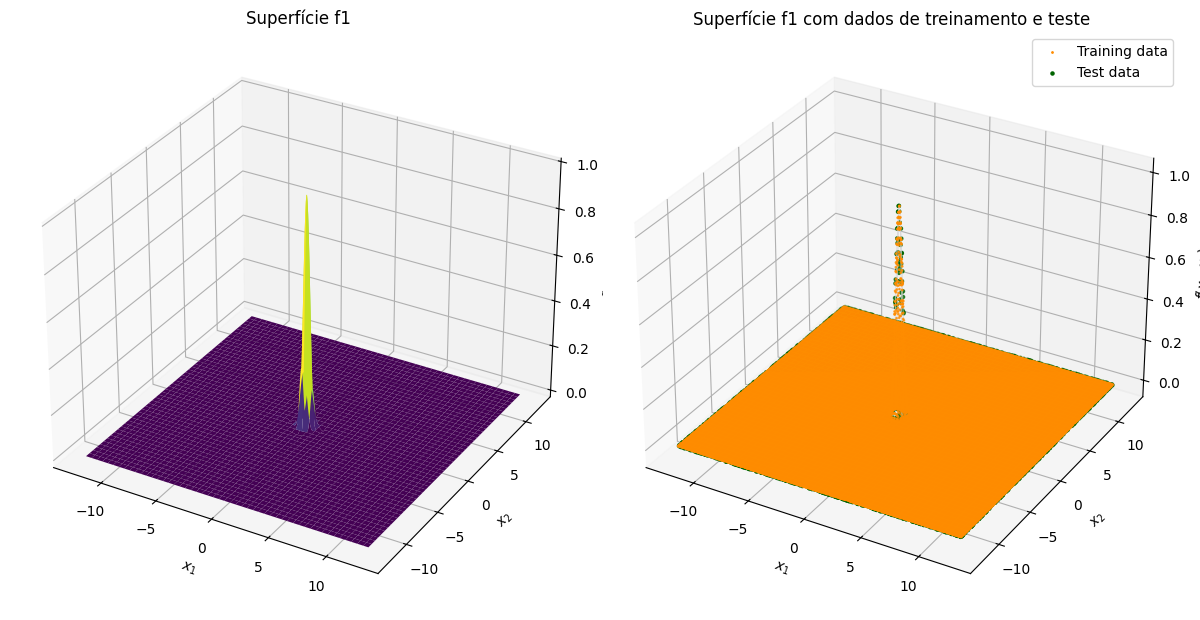

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10), subplot_kw=dict(projection='3d'))
ax[0].plot_surface(x1_f1, x2_f1, y , cmap='viridis', linewidth=0, antialiased=True)
ax[0].set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$f(x_1, x_2)$')
ax[0].set_title('Superfície f1')
ax[1].plot_wireframe(x1_f1, x2_f1, y, linewidths=0.5, color='lightgrey')
ax[1].scatter(Xf1_train[:, 0], Xf1_train[:, 1], yf1_train, s=1, color='darkorange', label='Training data')
ax[1].scatter(Xf1_val[:, 0], Xf1_val[:, 1], yf1_val, s=5, color='darkgreen', label='Test data')
ax[1].set_title('Superfície f1 com dados de treinamento e teste')

ax[1].set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

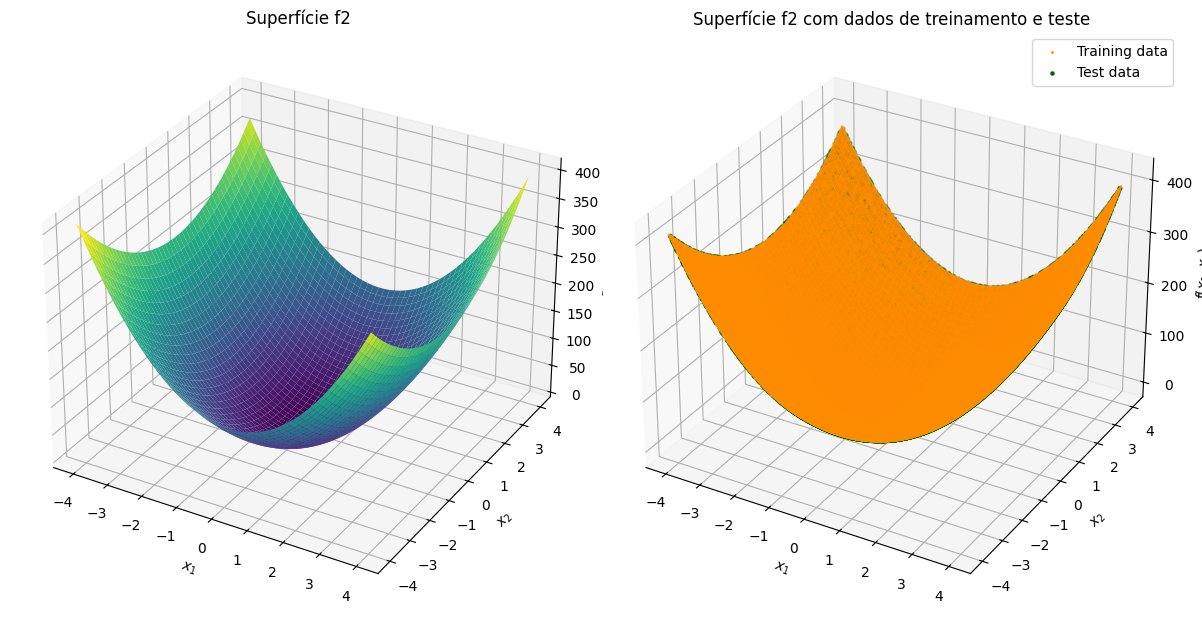

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10), subplot_kw=dict(projection='3d'))
ax[0].plot_surface(x1_f2, x2_f2, y2, cmap='viridis', linewidth=0, antialiased=True)
ax[0].set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$f(x_1, x_2)$')
ax[0].set_title('Superfície f2')
ax[1].plot_wireframe(x1_f2, x2_f2, y2, linewidths=0.5, color='lightgrey')
ax[1].scatter(Xf2_train[:, 0], Xf2_train[:, 1], yf2_train, s=1, color='darkorange', label='Training data')
ax[1].scatter(Xf2_val[:, 0], Xf2_val[:, 1], yf2_val, s=5, color='darkgreen', label='Test data')
ax[1].set_title('Superfície f2 com dados de treinamento e teste')

ax[1].set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

### Criando Modelos para descrever as duas funções

In [64]:
def get_model_describe_f1():
    model = Sequential([
        Dense(64, input_dim=2, activation='relu', name='fc1'),
        Dense(32, activation='relu', name='fc2'),
        Dense(4, activation='relu', name='fc4'),
        Dense(1, name='fc6')  # saída escalar
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [51]:
def get_model_describe_f2():
    model = Sequential([
        Dense(64, input_dim=2, activation='relu', name='fc1'),
        Dense(32, activation='relu', name='fc2'),
        Dense(4, activation='relu', name='fc4'),
        Dense(1, name='fc6')  # saída escalar
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [52]:
model_describe_f1 = get_model_describe_f1()
model_describe_f2 = get_model_describe_f2()

### Treinando os Modelos e Analisando seus Desempenhos

In [65]:
hist_f1 = model_describe_f1.fit(Xf1_train, yf1_train, validation_data=(Xf1_val, yf1_val),
                        epochs=20, batch_size=32, verbose=True)

Epoch 1/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 620us/step - loss: 0.0042 - val_loss: 2.0960e-05
Epoch 2/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 594us/step - loss: 1.4240e-05 - val_loss: 2.2942e-05
Epoch 3/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 622us/step - loss: 1.2562e-05 - val_loss: 1.2426e-05
Epoch 4/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 627us/step - loss: 1.1318e-05 - val_loss: 5.6545e-06
Epoch 5/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 593us/step - loss: 9.3186e-06 - val_loss: 3.9610e-06
Epoch 6/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 595us/step - loss: 6.1043e-06 - val_loss: 5.2906e-06
Epoch 7/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 598us/step - loss: 5.3924e-06 - val_loss: 7.8815e-06
Epoch 8/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 597us/step - loss: 6.3483e-06 - val_loss: 1.3014e-05
Epoch 9/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 597us/step - loss: 4.9211e-06 - val_loss: 7.5399e-06
Epoch 10/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 620us/step - loss: 3.9738e-06 - val_loss: 2.6912e-06
Epoch 11/20
5860/5860 ━

In [53]:
hist_f2 = model_describe_f2.fit(Xf2_train, yf2_train, validation_data=(Xf2_val, yf2_val),
                        epochs=20, batch_size=32, verbose=True)

Epoch 1/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 4s 565us/step - loss: 3264.0376 - val_loss: 2.9568
Epoch 2/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 566us/step - loss: 1.9955 - val_loss: 0.7029
Epoch 3/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 562us/step - loss: 0.6973 - val_loss: 0.4130
Epoch 4/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step - loss: 0.4451 - val_loss: 0.4648
Epoch 5/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 568us/step - loss: 0.3640 - val_loss: 0.5958
Epoch 6/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 562us/step - loss: 0.3091 - val_loss: 0.1891
Epoch 7/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 561us/step - loss: 0.2630 - val_loss: 0.3109
Epoch 8/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 574us/step - loss: 0.2940 - val_loss: 0.3151
Epoch 9/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 575us/step - loss: 0.2392 - val_loss: 0.1257
Epoch 10/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 570us/step - loss: 0.2254 - val_loss: 0.1872
Epoch 11/20
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 3s 562us/step - loss: 0.2433 - val_loss: 0.1591
Epoch

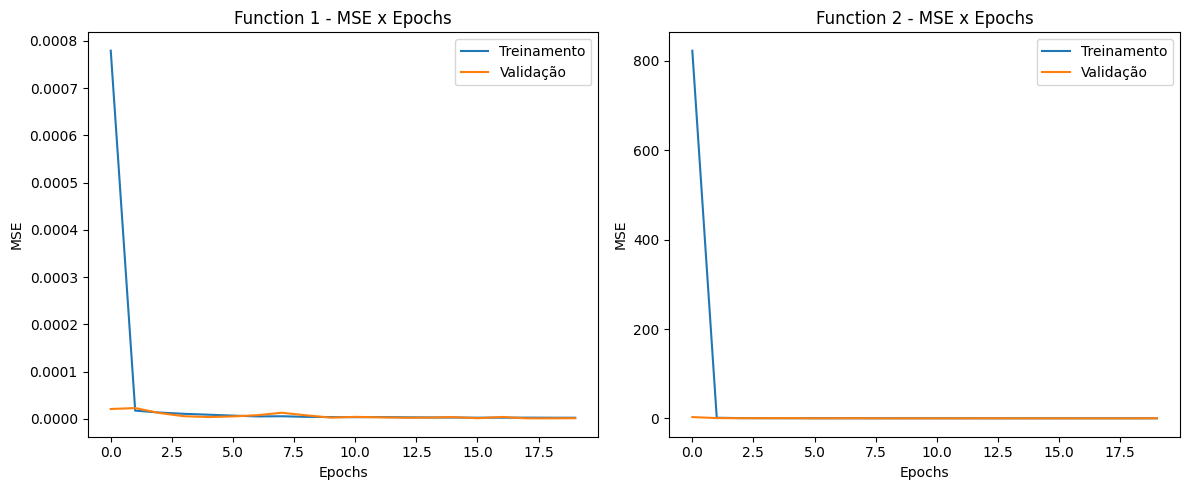

In [66]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist_f1.history['loss'], label='Treinamento')
plt.plot(hist_f1.history['val_loss'], label='Validação')
plt.title('Function 1 - MSE x Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()


plt.subplot(1,2,2)
plt.plot(hist_f2.history['loss'], label='Treinamento')
plt.plot(hist_f2.history['val_loss'], label='Validação')
plt.title('Function 2 - MSE x Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()
     

### Aplicando Modelo aos dados de Teste e gerando Predict Points

In [67]:
z1_pred = model_describe_f1.predict(Xf1_val).reshape(yf1_val.shape)

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step


In [59]:
z2_pred = model_describe_f2.predict(Xf2_val).reshape(yf2_val.shape)

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step


### Plots - Comparação Predicted Data x Test Data

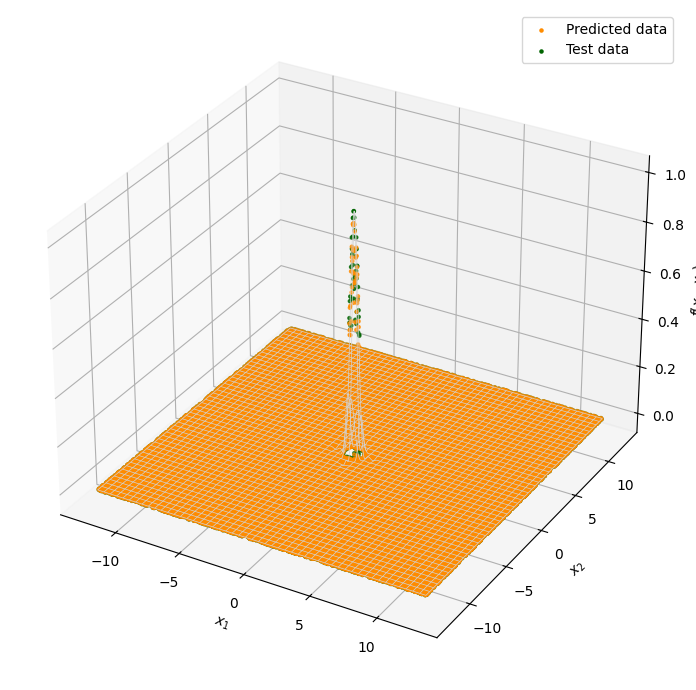

In [68]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1_f1, x2_f1, y, linewidths=0.5, color='lightgrey')
ax.scatter(Xf1_val[:,0], Xf1_val[:,1], z1_pred, s=5, color='darkorange', label='Predicted data')
ax.scatter(Xf1_val[:,0], Xf1_val[:,1], yf1_val, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

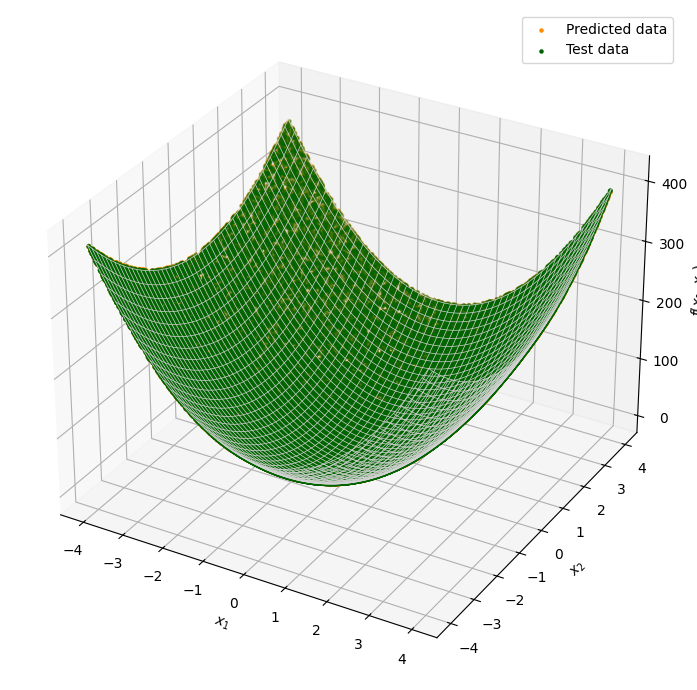

In [69]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))
ax.plot_wireframe(x1_f2, x2_f2, y2, linewidths=0.5, color='lightgrey')
ax.scatter(Xf2_val[:,0], Xf2_val[:,1], z2_pred, s=5, color='darkorange', label='Predicted data')
ax.scatter(Xf2_val[:,0], Xf2_val[:,1], yf2_val, s=5, color='darkgreen', label='Test data')
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)
plt.legend()
plt.tight_layout()
plt.show()

## Questão 5.2 - Classificação de Expirais
Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra classe. Gere as curvas das espirais usando as seguintes equações:

Para espiral 1:  
$$
x = \frac{\theta}{4} \cos(\theta), \quad y = \frac{\theta}{4} \sin(\theta), \quad \theta \geq 0
$$

Para espiral 2:  
$$
x = \left(\frac{\theta}{4} + 0.8\right) \cos(\theta), \quad y = \left(\frac{\theta}{4} + 0.8\right) \sin(\theta), \quad \theta \geq 0
$$

Solucione este problema utilizando uma rede perceptron de múltiplas camadas. Gere a partir das equações os dados para treinamento e teste. Determine a matriz de confusão.


## Questão 5.3 - Classificação de Padrões Bidimensionais
Considere o problema de classificação de padrões bidimensionais constituído neste caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada eixo são os centros de quatro semicírculos que se interceptam no interior do quadrado, originando quatro classes. As regiões de não interseção formam a quinta classe. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação. Defina uma a arquitetura da rede percetron a ser usada para solução do problema. Treine a rede perceptron para classificar os padrões associados a cada uma das classes. Verifique o desempenho do classificador usando o conjunto de validação, calculando: a matriz de confusão, a acurácia, o recall, a precisão e o F1-score.

## Questão 5.4 - Predição de uma Série Temporal
Considere o problema de predição de uma série temporal definida como $x(n) = v(n) + \beta v(n-1)v(n-2)$, com média zero e variância dada por $\sigma_x^2 = \sigma_v^2 + \beta^2\sigma_v^2$ onde $v(n)$ é um ruído branco gaussiano, como variância unitária e $\beta=0.5$. Utilizando uma rede perceptrons de múltiplas camadas (feedfoward) estime $\hat{x}(n+1) = f(x(n),x(n-1),x(n-2),x(n-3))$ usando como entrada o valor presente e os três últimos valores da série, isto é, no conjunto de treinamento utilize uma janela deslizante com n as três amostras anteriores. Isso correspode as entradas da rede neural.Avalie o desempenho mostrando a curva da série temporal , a curva de predição e a curva do erro de predição $e(n+1) = x(n+1) - \hat{x}(n+1)$

In [41]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Descrevendo as Funções do problema para o Python e Gerando os Dados

In [148]:
# parameters based on the problem 5.4
n_seed = 42
beta = 0.5
deviation = 1
n_samples = 10000

In [149]:
# generating white noise using numpy.random.Generator with a fixed seed
rng = np.random.default_rng(seed=n_seed)
v = rng.normal(beta, deviation, n_samples) 
x = v + beta * np.roll(v, -1) * np.roll(v, -2)

In [42]:
look_back = 4

X_data = []
y_data = []

for i in range(look_back, len(x) - 1):
    X_data.append(x[i - look_back:i])
    y_data.append(x[i + 1])

X_data = np.array(X_data)
y_data = np.array(y_data)

### Separando os dados em Treino e Teste

In [43]:
split_index = int(0.8 * len(X_data))  # 80% dos dados para treino
X_train, X_test = X_data[:split_index], X_data[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

In [44]:
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_test: {y_test.shape}")

Formato de X_train: (7996, 4)
Formato de y_train: (7996,)
Formato de X_test: (1999, 4)
Formato de y_test: (1999,)


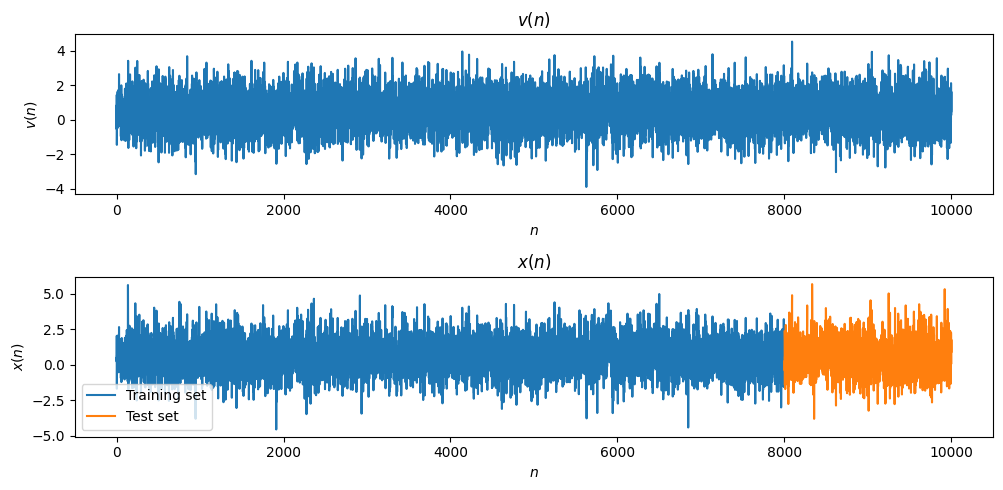

In [40]:
# plotting the data
fig, axes = plt.subplots(nrows=2, figsize=(10, 5))
split_x_index = int(0.8 * len(x))

axes[0].plot(v)
axes[0].set(
    title='$v(n)$',
    xlabel='$n$',
    ylabel='$v(n)$'
)

axes[1].plot(x[:split_x_index], label='Training set')
axes[1].plot(np.arange(n_samples-0.2*len(x), n_samples), x[split_x_index:] ,  label='Test set')

axes[1].legend()
axes[1].set(
    title='$x(n)$',
    xlabel='$n$',
    ylabel='$x(n)$'
)

plt.tight_layout()
plt.show()

### Colocando os dados em escala

In [150]:
# Normalizar os dados (boa prática para redes neurais)
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

print(f"Formato de X_train_scaled: {X_train_scaled.shape}")
print(f"Formato de y_train_scaled: {y_train_scaled.shape}")

Formato de X_train_scaled: (7996, 4)
Formato de y_train_scaled: (7996, 1)


### Definindo nosso Modelo

In [135]:
# defining the model
def get_model_define_time_serie():
    model = Sequential()
    model.add(Dense(64, input_shape=(4, )))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(4))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(1))

    model.compile(
        loss='mse',
        optimizer='adam',
        metrics=['mse']
    )
    
    return model

In [136]:
model = get_model_define_time_serie()

/Users/efrainmpp/Documents/Mestrado/Neural-Network-PPGEEC2321/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
# checking the model summary
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_72 (Activation)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,937 (11.47 KB)

 Trainable params: 2,737 (10.69 KB)

 Non-trainable params: 200 (800.00 B)

### Treinando o Modelo

In [138]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=True,
    shuffle=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10),
               ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)]
)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7942 - mse: 1.7942 - val_loss: 1.4833 - val_mse: 1.4833 - learning_rate: 0.0010
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 1.3206 - mse: 1.3206 - val_loss: 1.4300 - val_mse: 1.4300 - learning_rate: 0.0010
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 1.2851 - mse: 1.2851 - val_loss: 1.4324 - val_mse: 1.4324 - learning_rate: 0.0010
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 1.2680 - mse: 1.2680 - val_loss: 1.4332 - val_mse: 1.4332 - learning_rate: 0.0010
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 1.2608 - mse: 1.2608 - val_loss: 1.4300 - val_mse: 1.4300 - learning_rate: 0.0010
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 1.2504 - mse: 1.2504 - val_loss: 1.4375 - val_mse: 1.4375 - learning_rate: 0.0010
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1.2437 - mse: 1.2437 - val_loss: 1.4370 - val_mse: 1.4370 - learning_

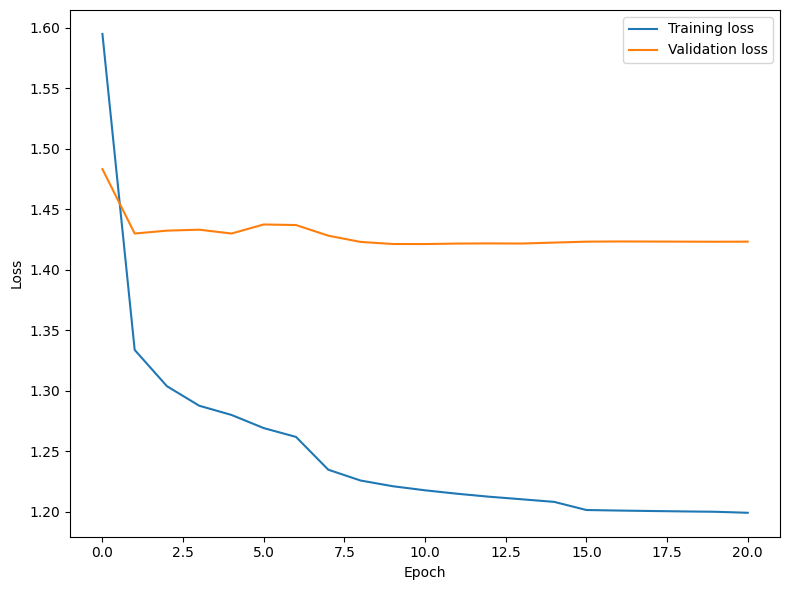

In [139]:
# plotting error curves
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')

ax.legend()
ax.set(
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

### Validando nosso Modelo 

In [142]:
# Fazer previsões no conjunto de teste (escalonado)
y_pred_scaled = model.predict(X_test_scaled)

# Desnormalizar as previsões e os valores reais
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calcular o erro de predição
erro = y_test_original.flatten() - y_pred.flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


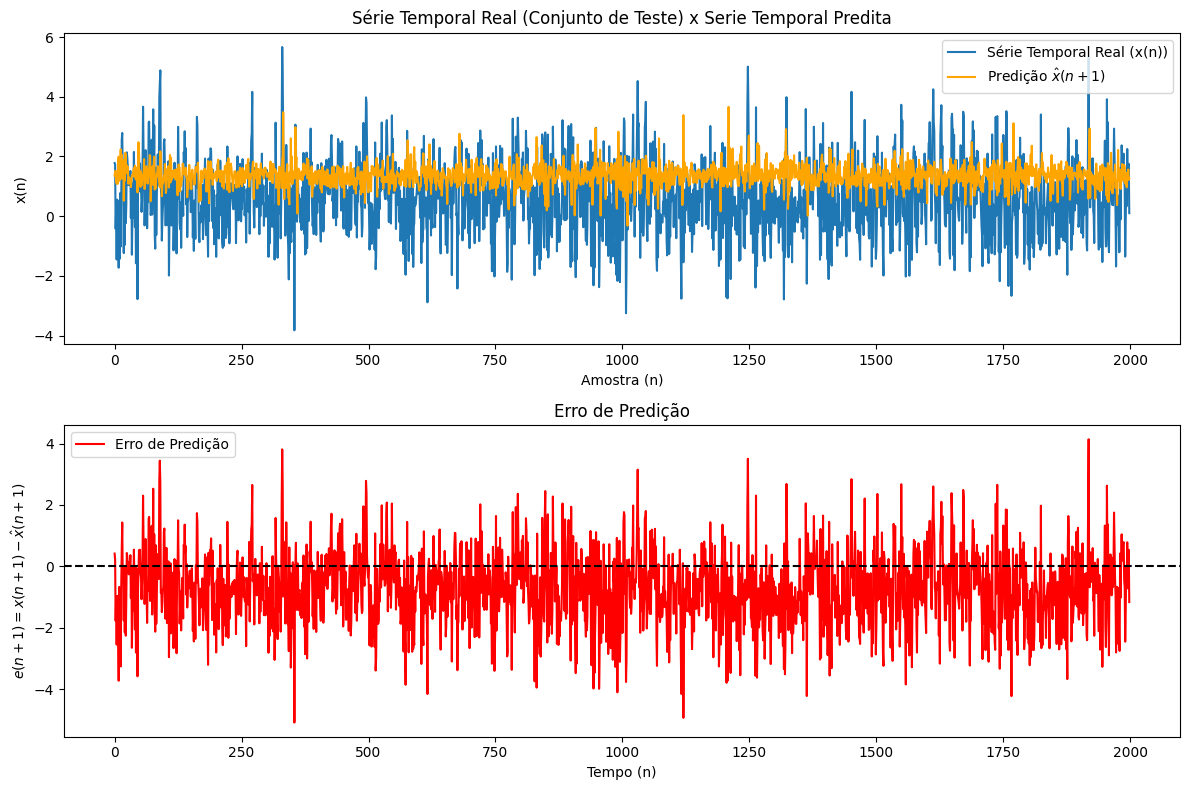


Erro Quadrático Médio (MSE) no conjunto de teste (original): 2.0665


In [147]:
# Visualizar os resultados
plt.figure(figsize=(12, 8))

# Curva da Série Temporal Real (no conjunto de teste)
plt.subplot(2, 1, 1)
plt.plot(range(len(y_test_original)), y_test_original, label='Série Temporal Real (x(n))')
plt.plot(range(len(y_pred)), y_pred, label='Predição $\hat{x}(n+1)$', color='orange')
plt.title('Série Temporal Real (Conjunto de Teste) x Serie Temporal Predita')
plt.xlabel('Amostra (n)')
plt.ylabel('x(n)')
plt.legend()

# Curva do Erro de Predição
plt.subplot(2, 1, 2)
plt.plot(range(len(erro)), erro, label='Erro de Predição', color='red')
plt.title('Erro de Predição')
plt.xlabel('Tempo (n)')
plt.ylabel('$e(n+1) = x(n+1) - \hat{x}(n+1)$')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular e imprimir o Erro Quadrático Médio no conjunto de teste (original)
mse_original = np.mean(erro**2)
print(f"\nErro Quadrático Médio (MSE) no conjunto de teste (original): {mse_original:.4f}")